In [1]:
from dotenv import load_dotenv
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
import operator

In [2]:
load_dotenv()

True

In [3]:
# creating the state for the chatbot

class State(TypedDict): 
    messages: Annotated[list, add_messages] # operator.add would also work

In [4]:
llm = init_chat_model("google_genai:gemini-2.0-flash")

In [8]:
def chatbot(state: State) : 
    return {'messages': [AIMessage(llm.invoke(state['messages']).content)]}


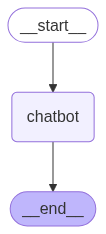

In [9]:
graph_builder = StateGraph(State)
graph_builder.add_node('chatbot', chatbot)
# add edges
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot',END)
graph = graph_builder.compile()
graph

In [10]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [HumanMessage(user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: AI agents are intelligent entities that can perceive their environment, reason, and take actions to achieve specific goals. They are essentially computer programs designed to act autonomously and adaptively in dynamic environments. Think of them as digital robots, but instead of physical bodies, they exist in the digital realm and interact with the world through data and code.

Here's a breakdown of the key characteristics of AI agents:

*   **Perception:** They can sense their environment through various sensors (e.g., cameras, microphones, APIs, databases, user inputs).
*   **Reasoning:** They use algorithms and models (e.g., machine learning, logic, planning) to process the information they gather and make decisions.
*   **Action:** They can perform actions to influence their environment (e.g., sending emails, controlling devices, making recommendations, providing information).
*   **Autonomy:** They operate without constant human intervention, making decisions and taking